<a href="https://colab.research.google.com/github/esh04/Clickbait-Identification/blob/main/Clickbait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING THE REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [ ]:
path = "trainData.csv"
df = pd.read_csv(path)
df.drop('id', inplace=True, axis=1)
df

,sentence,label
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0
...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0
41798,सबसे बड़ी आसानी के साथ। । ।\n,0


In [ ]:
sentence_list = df['sentence'].to_list()
sentence_list

['यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हेल का नमूना क्रेन द्वारा एक विशाल ट्रक पर ले जाया जाता है क्योंकि इसे चीन के एक संग्रहालय में ले जाया जा रहा है।\n',
 'जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इंस्टाग्राम रिटर्न आधिकारिक बनाता है\n',
 'रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है क्योंकि उसे तीन सेक्स आरोपों से मुक्त कर दिया गया है\n',
 'बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को गुमराह करते हुए कहा, तटकरे\n',
 'चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n',
 'नासा ने एक दृश्य जारी किया कि कैसे कार्बन डाइऑक्साइड पृथ्वी पर बढ़ रहा है और आप डरने जा रहे हैं\n',
 'कंस ने &#39;ट्रम्पकेयर&#39; की विफलता के बाद जीओपी विधायकों के दबाव के रूप में मेडिकेड का विस्तार करने के लिए कदम उठाए\n',
 'कॉनर मैकग्रेगर ने घोषणा की कि वह &#39;फ्लोयड&#39; मेवेदर और &#39;टेक ओवर बॉक्सिंग&#39; बंद कर देंगे\n',
 'ट्रिश क्लॉज़: माय आइरिस एक भयानक फोरसम की समीक्षा करते हैं\n',
 'इन 7 राज्यों में ड्राइवरों को नए साल से पहले अपने गैस टैंक भरने चाहिए\n',
 'एनबीए ऑल-स्टार गेम में बेयोंस, जे जेड और 

### Replacing various outliers in the dataset suitably

In [ ]:
new_sentence_list = []
for sent in sentence_list:
  sent = sent.replace('\n','')
  sent = sent.replace('&#39',"'")
  sent = sent.replace('quot;','"')
  sent = sent.replace('&','')
  sent = sent.replace('#','')
  sent = sent.replace('$','')
  sent = sent.replace('%','')
  sent = sent.replace('-','')
  sent = sent.replace('...','')
  new_sentence_list.append(sent)
new_sentence_list

['यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50टन व्हेल का नमूना क्रेन द्वारा एक विशाल ट्रक पर ले जाया जाता है क्योंकि इसे चीन के एक संग्रहालय में ले जाया जा रहा है।',
 'जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इंस्टाग्राम रिटर्न आधिकारिक बनाता है',
 'रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है क्योंकि उसे तीन सेक्स आरोपों से मुक्त कर दिया गया है',
 'बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को गुमराह करते हुए कहा, तटकरे',
 'चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया',
 'नासा ने एक दृश्य जारी किया कि कैसे कार्बन डाइऑक्साइड पृथ्वी पर बढ़ रहा है और आप डरने जा रहे हैं',
 'कंस ने ;ट्रम्पकेयर; की विफलता के बाद जीओपी विधायकों के दबाव के रूप में मेडिकेड का विस्तार करने के लिए कदम उठाए',
 'कॉनर मैकग्रेगर ने घोषणा की कि वह ;फ्लोयड; मेवेदर और ;टेक ओवर बॉक्सिंग; बंद कर देंगे',
 'ट्रिश क्लॉज़: माय आइरिस एक भयानक फोरसम की समीक्षा करते हैं',
 'इन 7 राज्यों में ड्राइवरों को नए साल से पहले अपने गैस टैंक भरने चाहिए',
 'एनबीए ऑलस्टार गेम में बेयोंस, जे जेड और ब्लू आइवी के कई चेहरों का आनंद लें',
 'खरीदारी

## Functions to remove numbers or capital letters from the text

In [ ]:
#FUNCTION TO REMOVE NUMERALS
import re 
def remove_num(list):
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list]
    return list

def remove_caps(list):
    pattern = '[a-zA-Z]+'
    list = [re.sub(pattern, '', i) for i in list]
    return list
  
#new_sentence_list = remove_num(new_sentence_list)
new_sentence_list = remove_caps(new_sentence_list)

new_sentence_list

['यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50टन व्हेल का नमूना क्रेन द्वारा एक विशाल ट्रक पर ले जाया जाता है क्योंकि इसे चीन के एक संग्रहालय में ले जाया जा रहा है।',
 'जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इंस्टाग्राम रिटर्न आधिकारिक बनाता है',
 'रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है क्योंकि उसे तीन सेक्स आरोपों से मुक्त कर दिया गया है',
 'बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को गुमराह करते हुए कहा, तटकरे',
 'चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया',
 'नासा ने एक दृश्य जारी किया कि कैसे कार्बन डाइऑक्साइड पृथ्वी पर बढ़ रहा है और आप डरने जा रहे हैं',
 'कंस ने ;ट्रम्पकेयर; की विफलता के बाद जीओपी विधायकों के दबाव के रूप में मेडिकेड का विस्तार करने के लिए कदम उठाए',
 'कॉनर मैकग्रेगर ने घोषणा की कि वह ;फ्लोयड; मेवेदर और ;टेक ओवर बॉक्सिंग; बंद कर देंगे',
 'ट्रिश क्लॉज़: माय आइरिस एक भयानक फोरसम की समीक्षा करते हैं',
 'इन 7 राज्यों में ड्राइवरों को नए साल से पहले अपने गैस टैंक भरने चाहिए',
 'एनबीए ऑलस्टार गेम में बेयोंस, जे जेड और ब्लू आइवी के कई चेहरों का आनंद लें',
 'खरीदारी

## Analysis Based on Word Tokens/ Number of words

In [ ]:
#sentence tokens for judging
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
no_of_tokens = []
list_of_tokens = []
for i in new_sentence_list:
  token_list = []
  for t in word_tokenize(i): 
    token_list.append(t)
  no_of_tokens.append(len(token_list))

  #maintain a list containing list of all tokens in a sentence
  list_of_tokens.append(token_list)

#add new column for analysis
df = df.assign(num_tokens = no_of_tokens)
df

,sentence,label,num_tokens
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8
...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,12
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7


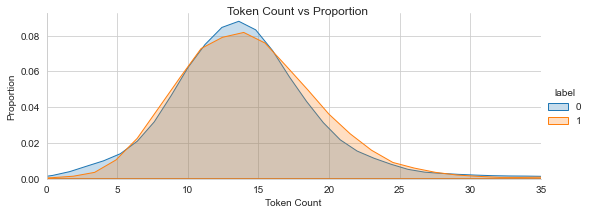

In [ ]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'num_tokens',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(0, 35))
plotOne.add_legend()
plotOne.set_axis_labels('Token Count', 'Proportion')
plotOne.fig.suptitle('Token Count vs Proportion')
plt.show()

## Analysis based on exclamation and question marks

In [ ]:
#This checks for presence of ! and ?
que_exclam = []
for i in sentence_list:
  count = 0;
  for j in range(0,len(i)):
    if i[j] in ('!',"?"):  
      count = count + 1;  
  que_exclam.append(count)
df = df.assign(valid_punct = que_exclam)
df

,sentence,label,num_tokens,valid_punct
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34,1
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0
...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,12,0
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7,0


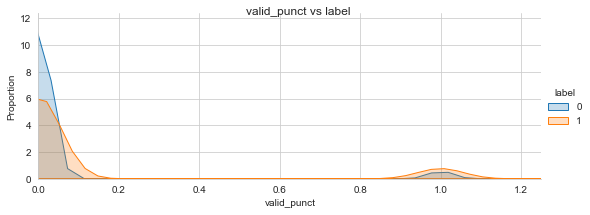

In [ ]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'valid_punct',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(0, 1.25))
plotOne.add_legend()
plotOne.set_axis_labels('valid_punct', 'Proportion')
plotOne.fig.suptitle('valid_punct vs label')
plt.show()

## Analysis based on number of stop words

In [ ]:
#Number of stopwords in the headline
def count_stopwords(sentence_list,df):
    filename = 'stopwords.txt'
    file = open(filename, 'rt')
    stop_words = file.read()
    file.close()
    count_stopwords = []
    for sentence in sentence_list:
        count = 0;
        for word in sentence:
            if word in stop_words:  
              count += 1;  
        count_stopwords.append(count)
    df = df.assign(num_stopwords = count_stopwords)
    return df

df = count_stopwords(list_of_tokens,df)
df
        

,sentence,label,num_tokens,valid_punct,num_stopwords
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34,1,19
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0,5
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0,13
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0,5
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0,2
...,...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,12,0,4
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0,7
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0,4
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7,0,2


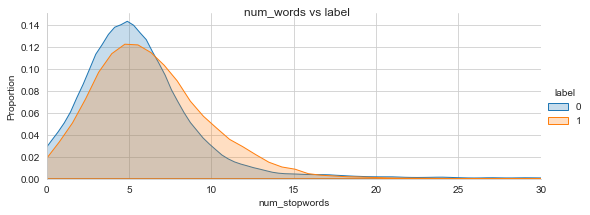

In [ ]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'num_stopwords',shade=True)
plotOne.set(xlim=(0, 30))
plotOne.add_legend()
plotOne.set_axis_labels('num_stopwords', 'Proportion')
plotOne.fig.suptitle('num_words vs label')
plt.show()

## Analysis based on numerals present or not in the dataset

In [ ]:
#This checks if sentence has number in it or not
has_digit = []
for i in sentence_list:
  count = 0
  for char in i:
    if char.isdigit():
      count = count + 1
  has_digit.append(count)
num_dig = []
for i in has_digit:
  if i >= 2:
    num_dig.append(1)
  else:
    num_dig.append(0)

df = df.assign(has_num = num_dig)
df

In [ ]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'has_num',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(0, 1.25))
plotOne.add_legend()
plotOne.set_axis_labels('has_num', 'Proportion')
plotOne.fig.suptitle('has_num vs label')
plt.show()

POLYGLOT FOR HINDI NER

In [ ]:
!pip install polyglot
!pip install PyICU
!pip install pycld2
from polyglot.downloader import downloader
print(downloader.supported_languages_table("ner2", 26))
!pip install morfessor

from polyglot.downloader import downloader
!polyglot download embeddings2.hi
!polyglot download ner2.hi

from polyglot.text import Text
l = []
for blob in sentence_list:
  text = Text(blob, hint_language_code='hi')
  l.append(text.entities)